In [86]:
import tensorflow 
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense

# import Dataset

In [87]:
(X_train,y_train),(X_test,y_test)=tensorflow.keras.datasets.mnist.load_data()


In [88]:
len(X_train),len(X_test)

(60000, 10000)

In [89]:
len(y_train),len(y_test)

(60000, 10000)

In [90]:
X_train.shape

(60000, 28, 28)

In [91]:
y_train.shape

(60000,)

In [92]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [93]:
import matplotlib.pyplot as plt

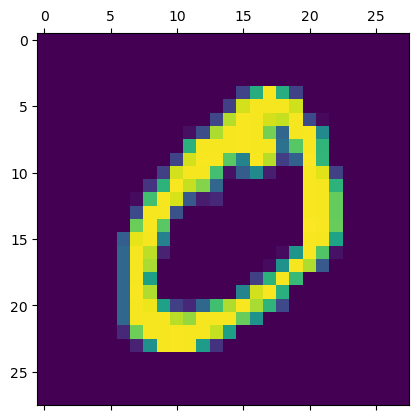

In [94]:
plt.matshow(X_train[1])

In [95]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

# scale training data

In [96]:
X_train=X_train/255
X_test=X_test/255

# model building


In [97]:
digit_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(10, activation='softmax') 
])

In [98]:
digit_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [99]:
digit_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [100]:
digit_model.fit(X_train, y_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4722 - accuracy: 0.8753
Epoch 2/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3042 - accuracy: 0.9153
Epoch 3/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2831 - accuracy: 0.9205
Epoch 4/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2735 - accuracy: 0.9238
Epoch 5/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2665 - accuracy: 0.9257
Epoch 6/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2621 - accuracy: 0.9271
Epoch 7/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2586 - accuracy: 0.9288


In [101]:
digit_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2700 - accuracy: 0.9245


[0.26995140314102173, 0.9244999885559082]

In [105]:
y_pred=digit_model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


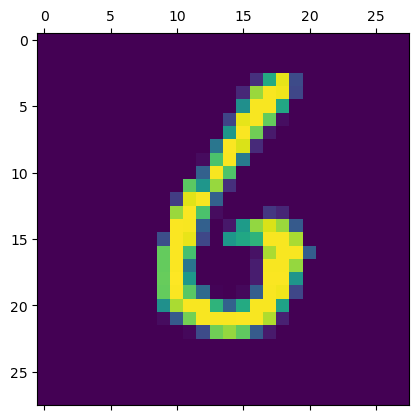

In [113]:
plt.matshow(X_test[50])

In [112]:
np.argmax(y_pred[50])

6

In [114]:
y_pred_labels=[np.argmax(i) for i in y_pred]

In [115]:
cm=tensorflow.math.confusion_matrix(y_test,y_pred_labels)

Text(50.722222222222214, 0.5, 'true valyues')

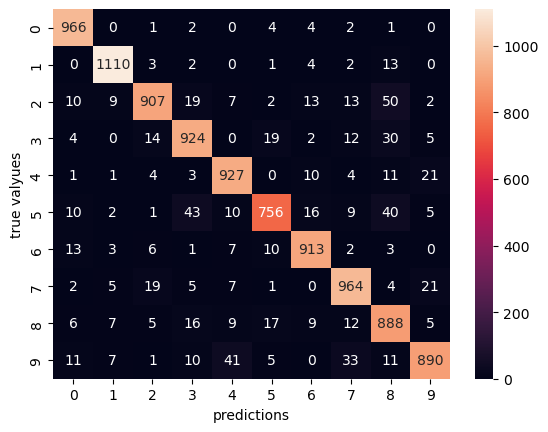

In [119]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predictions')
plt.ylabel('true valyues')

# with hidden layers

In [102]:
hl_model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(100 ,activation='relu'),
    Dense(10,activation='softmax')
])

In [103]:
hl_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 100)               78500     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [104]:
hl_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [120]:
hl_model.fit(X_train,y_train,epochs=7)

Epoch 1/7
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2764 - accuracy: 0.9205
Epoch 2/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1220 - accuracy: 0.9639
Epoch 3/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0854 - accuracy: 0.9741
Epoch 4/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0659 - accuracy: 0.9797
Epoch 5/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0508 - accuracy: 0.9842
Epoch 6/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0412 - accuracy: 0.9876
Epoch 7/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0334 - accuracy: 0.9901


In [122]:
hl_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0980 - accuracy: 0.9716


[0.0980433002114296, 0.9715999960899353]

In [123]:
hl_pred=hl_model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [125]:
hl_cm=tensorflow.math.confusion_matrix(y_test,[np.argmax(i) for i in hl_pred])

<Axes: >

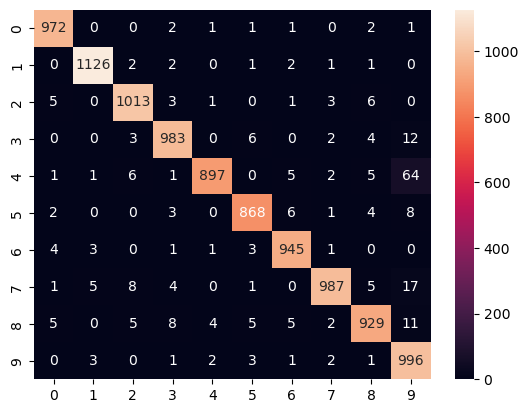

In [126]:
sns.heatmap(hl_cm,annot=True,fmt='d')